##  Feature selection and Elastic Net

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew

%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
%matplotlib inline

In [47]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [48]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [49]:
# Select only confirmed features
# See https://www.kaggle.com/jimthompson/house-prices-advanced-regression-techniques/boruta-feature-importance-analysis

features = ['GrLivArea', # 20.80162258 20.78502805 18.535841023 23.5716257     1.00 Confirmed
'OverallQual', #17.20747969 17.26901173 14.735546931 18.7973371     1.00 Confirmed
'2ndFlrSF', #13.97016925 14.02202180 10.257385951 16.5308220     1.00 Confirmed
'TotalBsmtSF', #14.03116430 13.98628589 10.614392984 16.4311992     1.00 Confirmed
'1stFlrSF', #13.53842250 13.59501091 10.887199720 15.3962367     1.00 Confirmed
'GarageCars', #12.99096564 13.10911536 10.005608253 14.8684197     1.00 Confirmed
'YearBuilt', #12.77227303 12.96056795  7.156390354 14.3606464     1.00 Confirmed
'GarageArea', #12.87362160 12.94534460  9.580747522 14.3714374     1.00 Confirmed
'ExterQual', #11.86835387 11.85978444  9.401588413 13.1237173     1.00 Confirmed
'YearRemodAdd', #11.09346736 11.22757800  8.721053537 12.7273884     1.00 Confirmed
'FireplaceQu', #10.87762424 10.93432931  5.498479708 13.0706797     1.00 Confirmed
'GarageYrBlt', #10.67005514 10.82840809  8.501312236 12.1919028     1.00 Confirmed
'FullBath', #10.47163205 10.51677018  8.732885348 11.8151891     1.00 Confirmed
'MSSubClass', #9.96401126  9.98159856  7.613579283 12.2973335     1.00 Confirmed
'LotArea', #9.79296636  9.89830848  6.943826388 12.5682534     1.00 Confirmed
'Fireplaces', #9.66905933  9.84059387  5.554397962 11.6734722     1.00 Confirmed
'KitchenQual', #9.77537742  9.69474211  7.989157468 11.6201471     1.00 Confirmed
'MSZoning', #9.07975279  9.07074946  6.434779296 12.8499436     1.00 Confirmed
'GarageType', #8.89128148  8.88041430  6.364256309 11.2319383     1.00 Confirmed
'BsmtFinSF1', #8.84836324  8.83661964  5.059794077 12.2808132     1.00 Confirmed
'Neighborhood', #8.57710266  8.51393920  7.188309021  9.9319210     1.00 Confirmed
'BsmtQual', #8.23958487  8.36102702  5.663597143 10.1943948     1.00 Confirmed
'TotRmsAbvGrd', #8.29632972  8.20660262  5.880224404 10.7969525     1.00 Confirmed
'HalfBath', #7.60841029  7.66129333  5.608800395  9.4860838     1.00 Confirmed
'BldgType', #7.64851612  7.63473450  5.604601563  9.7300625     1.00 Confirmed
'GarageFinish', #7.37692819  7.48666734  5.001123540  9.6642313     1.00 Confirmed
'Foundation', #7.04380599  7.07941011  3.939492747  8.3260506     1.00 Confirmed
'BedroomAbvGr', #6.97855776  6.92797733  5.180428532  9.2605613     1.00 Confirmed
'HouseStyle', #6.47562365  6.52982412  3.809114311  8.8377330     1.00 Confirmed
'CentralAir', #6.32975959  6.41964096  4.194141479  8.3902280     1.00 Confirmed
'OpenPorchSF', #6.30199504  6.28881903  3.942399414  8.8216412     1.00 Confirmed
'HeatingQC', #6.15728069  6.11610877  4.608494036  7.7905369     1.00 Confirmed
'BsmtFinType1', #5.85144584  5.92653496  4.122724825  8.1796761     1.00 Confirmed
'BsmtUnfSF', #5.72337504  5.77767513  2.475702180  7.6975185     0.99 Confirmed
'GarageCond', #5.65861401  5.68221518  3.893953120  7.3790515     1.00 Confirmed
'GarageQual', #5.32749624  5.47989904  2.204987026  7.5430524     0.98 Confirmed
'KitchenAbvGr', #5.20143995  5.20928831  3.115232120  6.4785585     1.00 Confirmed
'OverallCond', #5.31829536  5.13141579  3.055097039  8.9185568     1.00 Confirmed
'BsmtCond', #4.82229965  4.87416889  2.918196299  7.9059434     1.00 Confirmed
'MasVnrArea', #4.93836457  4.85991807  2.408535137  8.1105552     0.98 Confirmed
'BsmtFullBath', #4.41994585  4.30670156  2.401730987  7.4791359     0.96 Confirmed
'Exterior1st', #4.23179837  4.20688483  2.413359612  6.1084226     0.96 Confirmed
'Exterior2nd', #3.97397863  4.07693335  0.914055339  6.2613844     0.89 Confirmed
'PavedDrive', #3.97533101  3.96847203  1.957404499  5.6070983     0.96 Confirmed
'WoodDeckSF', #3.74508340  3.78245883  1.512694778  6.1396681     0.86 Confirmed
'LandContour', #3.65162656  3.64218746  1.018541052  5.1008705     0.87 Confirmed
'MasVnrType', #2.95553280  3.05884348  0.346963203  5.0935353     0.70 Confirmed
'BsmtFinType2', #3.06100746  3.03632436  0.568929418  4.5369251     0.75 Confirmed
'Functional', #2.97692887  3.01410578  1.007001090  4.9277739     0.72 Confirmed
'Fence', #2.87437847  2.84348778  1.237296721  3.9823772     0.68 Confirmed
## 51 SaleCondition  2.65025391  2.70646118  0.951359668  4.4601754     0.52 Tentative
## 52         Alley  2.67035733  2.70472574  1.268680305  4.3114284     0.58 Tentative
## 53      LotShape  2.63112778  2.67582920  0.699589380  4.8668368     0.54 Tentative
## 54    Electrical  2.63078879  2.65208364  1.020791484  3.8209051     0.57 Tentative
## 55     RoofStyle  2.47017605  2.61479890 -0.109630991  5.1061453     0.54 Tentative
## 56    Condition1  2.29266882  2.40508855  0.039632740  3.7447582     0.42 Tentative
## 57  BsmtExposure  2.49802250  2.38929143 -0.873824709  4.6534540     0.48 Tentative
## 58 EnclosedPorch  2.24471184  2.35625698 -0.311363698  3.9287300     0.36 Tentative
## 59     LandSlope  2.21914061  2.12040886  0.389757474  4.5015780     0.37 Tentative
]

In [50]:
train = train[features+['SalePrice']]
test = test[['Id']+features]

In [51]:
train.shape

(1460, 51)

In [52]:
all_data = pd.concat((train.loc[:,'GrLivArea':'Fence'],
                      test.loc[:,'GrLivArea':'Fence']))

###Data preprocessing: 
We're not going to do anything fancy here: 
 
- First I'll transform the skewed numeric features by taking log(feature + 1) - this will make the features more normal    
- Create Dummy variables for the categorical features    
- Replace the numeric missing values (NaN's) with the mean of their respective columns

array([[<matplotlib.axes.AxesSubplot object at 0x7f4d5359cba8>,
        <matplotlib.axes.AxesSubplot object at 0x7f4d534fee10>]], dtype=object)

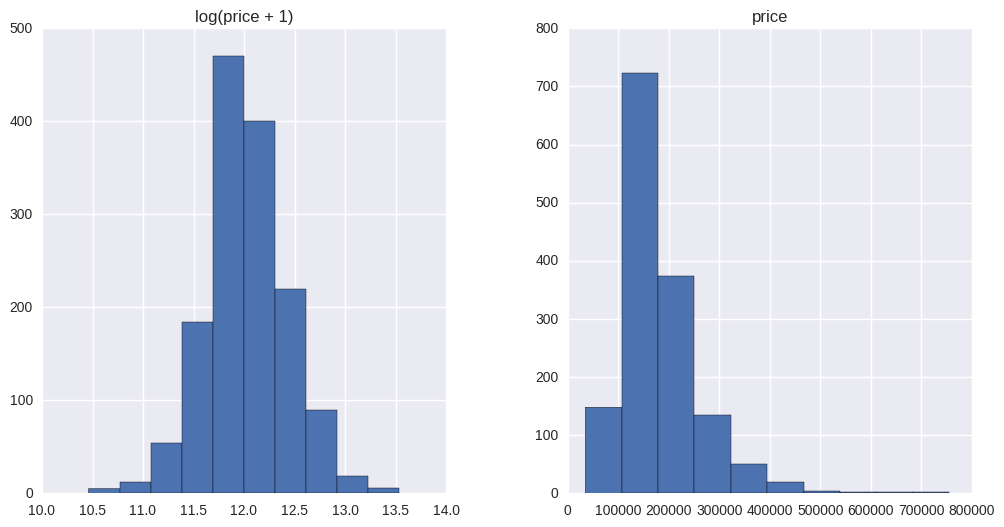

In [53]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
prices.hist()

In [54]:
#log transform the target:
train["SalePrice"] = np.log1p(train["SalePrice"])



#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [55]:
#impute NA's, numerical features with the median, categorical values with most common value:

for feature in all_data.select_dtypes(exclude=['object']).columns:
        all_data[feature].fillna(all_data[feature].median(), inplace = True)
for feature in all_data.select_dtypes(include=['object']).columns: 
        all_data[feature].fillna(all_data[feature].value_counts().idxmax(), inplace = True)

In [56]:
all_data = pd.get_dummies(all_data)

In [57]:
#creating matrices for sklearn:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

In [58]:
X_train.shape

(1460, 186)

###Elastic Net

In [59]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from itertools import product

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="mean_squared_error", cv = 5))
    return(rmse)

In [60]:
alphas = [0.0005, 0.001, 0.01, 0.03, 0.05, 0.1]
l1_ratios = [1.5, 1.1, 1, 0.9, 0.8, 0.7, 0.5]

In [61]:
cv_elastic = [rmse_cv(ElasticNet(alpha = alpha, l1_ratio=l1_ratio)).mean() 
            for (alpha, l1_ratio) in product(alphas, l1_ratios)]

/usr/local/lib/python3.4/dist-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/lib/python3.4/dist-packages/sklearn/metri

In [62]:
elastic = ElasticNet(alpha=0.0005, l1_ratio=0.9)

In [63]:
elastic.fit(X_train, y)

ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


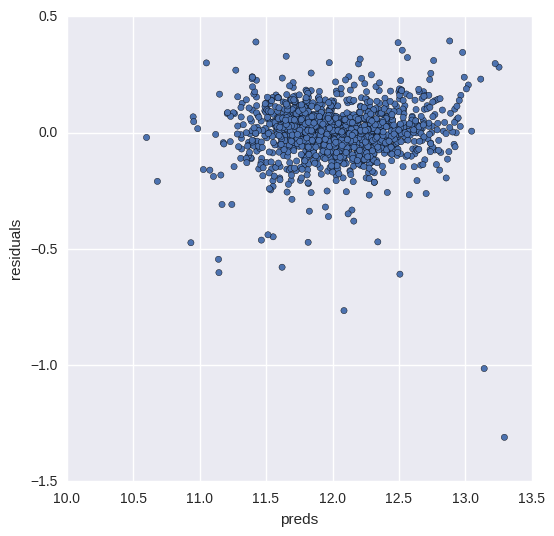

In [64]:
#let's look at the residuals as well:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":elastic.predict(X_train), "true":y})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

In [65]:
rmse = np.sqrt(np.mean((preds['true']-preds['preds'])**2))
print ('RMSE: {0:.4f}'.format(rmse))

RMSE: 0.1155


In [66]:
from sklearn.metrics import r2_score
print('R^2 train: %.3f' %  r2_score(preds['true'], preds['preds']))

R^2 train: 0.916


In [67]:
coef = pd.Series(elastic.coef_, index = X_train.columns)

In [68]:
print("Elastic Net picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Elastic Net picked 90 variables and eliminated the other 96 variables


We can also take a look directly at what the most important coefficients are:

In [69]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

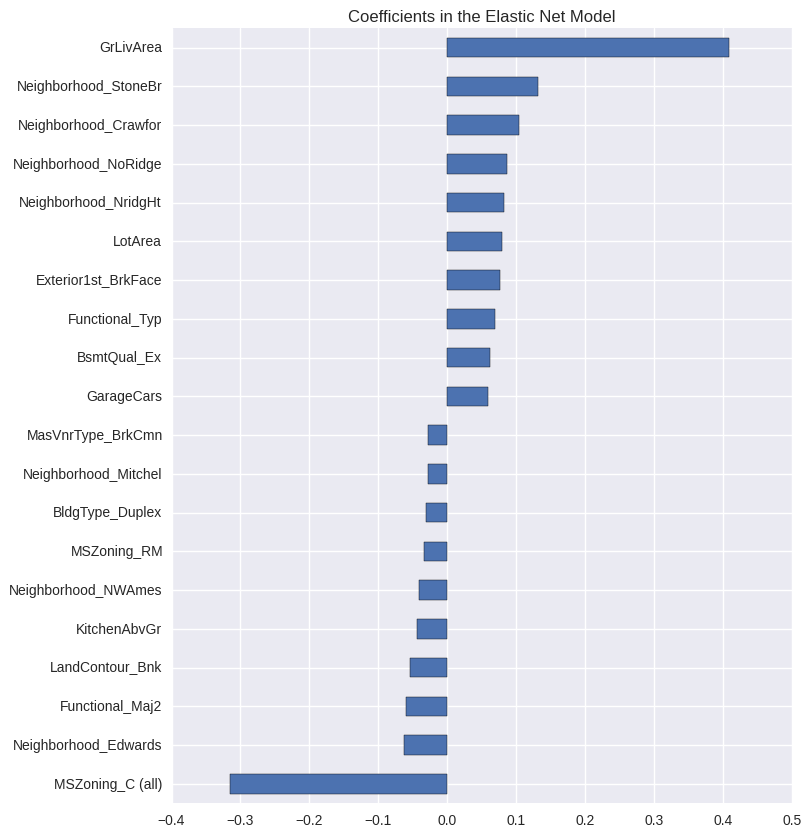

In [70]:
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Elastic Net Model")

The most important positive feature is `GrLivArea` -  the above ground area by area square feet. This definitely sense. Then a few other  location and quality features contributed positively. Some of the negative features make less sense and would be worth looking into more - it seems like they might come from unbalanced categorical variables.

 Also note that unlike the feature importance you'd get from a random forest these are _actual_ coefficients in your model - so you can say precisely why the predicted price is what it is. The only issue here is that we log_transformed both the target and the numeric features so the actual magnitudes are a bit hard to interpret. 

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


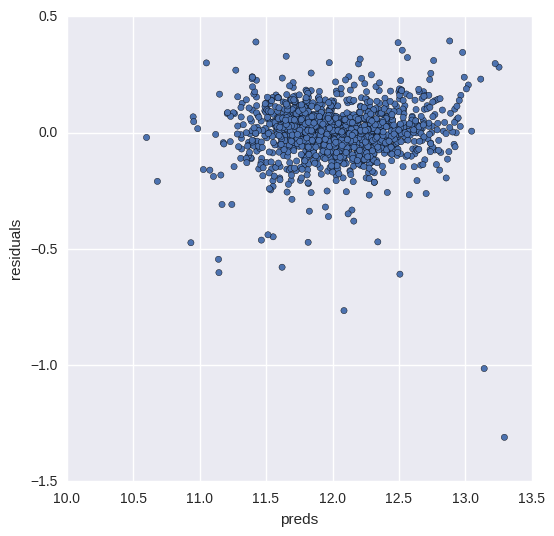

In [71]:
#let's look at the residuals as well:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":elastic.predict(X_train), "true":y})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

The residual plot looks pretty good.To wrap it up let's predict on the test set and submit on the leaderboard:

In [72]:
preds = np.expm1(elastic.predict(X_test))

In [73]:
solution = pd.DataFrame({"id":test.Id, "SalePrice":preds}, columns=['id', 'SalePrice'])
solution.to_csv("elastic2.csv", index = False)